In [1]:
# This script will be receive a value of latitude and longitude, will connect in database
# process result obtained and generate a graph
%matplotlib inline
import pymysql
import time
import geopip
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# input data
latitude = input("Digite a latitude desejada: ")
longitude = input("Digite a longitude desejada: ")

latitude = float(latitude)
longitude = float(longitude)

startTime = time.time()

connection = pymysql.connect(host='localhost',
                             database='nasadata',
                             user='root',
                             passwd='felipe3211')

mycursor = connection.cursor()

Digite a latitude desejada: -10
Digite a longitude desejada: -53


In [3]:
sql = "SELECT * from irradiation2 WHERE latitude =%s AND longitude =%s"

In [4]:
try:
    response = geopip.search(lat=latitude, lng=longitude)
    country = response.get('NAME')
    if country != 'Brazil':
        exit("Coords do not belong to Brazil!")
except:
    exit("Coords do not belong to Brazil!")

# Process latitude and longitude to do reguest to database
rounded_lat = round(latitude, 1)
rounded_lng = round(longitude, 1)

# Bellow I Have decimal parte of earch number
decimal_part_of_lat = round(rounded_lat-int(rounded_lat), 1)
decimal_part_of_lng = round(rounded_lng-int(rounded_lng), 1)

# Verify if I have the latitude in DB
increment_lat = 0
increment_lng = 0
if decimal_part_of_lat*10 % 2 == 0:
    pass
else:
    increment_lat = 0.1

if decimal_part_of_lng*10 % 2 == 0:
    pass
else:
    increment_lng = 0.1

lat_query = round(rounded_lat+increment_lat, 1)
lng_query = round(rounded_lng+increment_lng, 1)

val = (lat_query, lng_query)
mycursor.execute(sql, val)

444

In [5]:
records = mycursor.fetchall()
# todo insert here tratment to case record are empty

In [6]:
list_of_months = [[], [], [], [], [], [], [], [], [], [], [], []]  # List 12 X N
for row in records:
    identify, lat, lng, year, month, value = row
    if value == -999.0:  # append only valid values
        continue
    list_of_months[int(month)-1].append(float(value))


In [7]:
month_averages = []
for i in range(12):
    average = sum(list_of_months[i])/len(list_of_months[i])
    month_averages.append((float(average)))
    print("Para o mes {} a media foi {}".format(i+1, average))


endTime = time.time()
totalTime = endTime - startTime

Para o mes 1 a media foi 4.8876470588235295
Para o mes 2 a media foi 4.915882352941176
Para o mes 3 a media foi 4.765294117647057
Para o mes 4 a media foi 4.877941176470587
Para o mes 5 a media foi 5.02470588235294
Para o mes 6 a media foi 5.460882352941176
Para o mes 7 a media foi 5.767428571428571
Para o mes 8 a media foi 5.980000000000001
Para o mes 9 a media foi 5.693428571428571
Para o mes 10 a media foi 5.449142857142856
Para o mes 11 a media foi 5.107142857142858
Para o mes 12 a media foi 4.825714285714285


In [8]:
# Set the locator
locator = mdates.MonthLocator
# Specify the format - %b gives up Jan, Feb...
fmt = mdates.DateFormatter('%b')
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']


<Figure size 432x288 with 0 Axes>

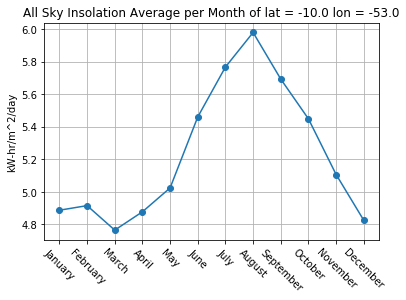

In [11]:
font1 = {
    'weight': 'bold'
}

# plot area
plt.figure()
fix, ax = plt.subplots(1, 1)

# todo parametrise values of x and y with base of max and min value of irradiation
#plt.text(x=0, y=3, s="Latitude: ", fontdict=font1)
#plt.text(x=2, y=3, s=str(latitude))
#plt.text(x=0, y=2.5, s="Longitude: ", fontdict=font1)
#plt.text(x=2, y=2.5, s=str(longitude))

ax.plot(month_list, month_averages, 'o-')

plt.xticks(rotation=-45)
plt.ylabel('kW-hr/m^2/day')
plt.grid(True)

plt.title('All Sky Insolation Average per Month of lat = {} lon = {}'.format(str(latitude), str(longitude)))
plt.show()